In [27]:
# import libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup

# .venv\scripts\activate

In [28]:
# fbref table link
url_df = 'https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats'
# Header hinzufügen um 403 Fehler zu vermeiden
headers = {'User-Agent': 'Mozilla/5.0'}
df_fb = pd.read_html(requests.get(url_df).text.replace('<!--','').replace('-->',''))
print(df_fb)

C:\Users\elias\AppData\Local\Temp\ipykernel_21648\3551408953.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_fb = pd.read_html(requests.get(url_df).text.replace('<!--','').replace('-->',''))


[   Unnamed: 0_level_0 Unnamed: 1_level_0 Performance                      \
     Competition Name                 MP         Gls   Ast PKatt PKatt.1   
0       de Bundesliga                NaN        1.55  1.14  0.16    0.16   
1          es La Liga                NaN        1.27  0.91  0.13    0.13   
2          fr Ligue 1                NaN        1.25  0.82  0.17    0.17   
3  eng Premier League                NaN        1.55  1.12  0.14    0.14   
4          it Serie A                NaN        1.26  0.89  0.18    0.18   

                                 Expected                              \
     PK  CrdY  CrdR  G-PK G+A-PK       xG  npxG   xAG xG+xAG npxG+xAG   
0  0.13  2.12  0.10  1.42   2.56     1.52  1.39  1.09   2.60     2.47   
1  0.10  2.45  0.13  1.17   2.08     1.30  1.19  0.93   2.22     2.12   
2  0.13  1.93  0.12  1.12   1.94     1.34  1.21  0.94   2.28     2.15   
3  0.12  2.25  0.08  1.42   2.54     1.54  1.43  1.12   2.65     2.55   
4  0.13  2.23  0.09  1.12   

In [29]:
# zweite Tabelle auswählen
df_second_table = df_fb[1]

# Header löschen
df_second_table.columns = df_second_table.columns.droplevel()

# erste Zeile löschen
df_second_table = df_second_table.drop(df_second_table.columns[0], axis=1)

# Spaltennamen anzeigen
print(df_second_table.columns)

# letze Spalte löschen
df_second_table = df_second_table.drop(df_second_table.columns[-1], axis=1)

# doppelte Spalten löschen
df_third_table_witout_doubles = df_second_table.loc[:, ~df_second_table.columns.duplicated()]
df_second_table = df_third_table_witout_doubles

# Spaltennamen anzeigen
print(df_second_table.columns)


Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls', 'Ast', 'G+A', 'G-PK', 'G+A-PK', 'xG', 'xAG', 'xG+xAG', 'npxG',
       'npxG+xAG', 'Matches'],
      dtype='object')
Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'G+A-PK', 'xG+xAG'],
      dtype='object')


In [30]:
# In Spalte "Age" alles nach den ersten 2 Zeichen löschen
df_second_table['Age'] = df_second_table['Age'].str[:2]

# Spalte mit namen "Nation", "Squad", "Born", "G+A-PK" und "xG+xAG" löschen
df_second_table = df_second_table.drop('Nation', axis=1)
df_second_table = df_second_table.drop('Squad', axis=1)
df_second_table = df_second_table.drop('G+A-PK', axis=1)
df_second_table = df_second_table.drop('xG+xAG', axis=1)
df_second_table = df_second_table.drop('Born', axis=1)


# Nur Zeilen behalten die in der Spalte "Pos" den Wert "FW" "MF,FW" oder "FW,MF" haben
df_second_table = df_second_table[df_second_table['Pos'].isin(['FW', 'MF,FW', 'FW,MF',])]

# Spalte "Pos" löschen
df_second_table = df_second_table.drop('Pos', axis=1)

# Anzeigen der zweiten Tabelle
print(df_second_table)

                  Player                Comp Age  MP Starts   Min   90s Gls  \
1       Brenden Aaronson       de Bundesliga  23  23      8   759   8.4   2   
6         Matthis Abline          fr Ligue 1  21  16      6   557   6.2   2   
8      Zakaria Aboukhlal          fr Ligue 1  24   7      4   395   4.4   3   
12    Bénie Adama Traore  eng Premier League  21   8      3   387   4.3   0   
13    Bénie Adama Traore          fr Ligue 1  21   7      2   275   3.1   0   
...                  ...                 ...  ..  ..    ...   ...   ...  ..   
2842       Edon Zhegrova          fr Ligue 1  25  26     21  1835  20.4   5   
2847      Joshua Zirkzee          it Serie A  22  28     26  2281  25.3  10   
2848        Simon Zoller       de Bundesliga  32   1      0    45   0.5   0   
2857         Milan Đurić          it Serie A  33  20     13  1204  13.4   5   
2858         Milan Đurić          it Serie A  33   9      7   652   7.2   0   

     Ast G+A  ... PKatt CrdY CrdR   xG npxG  xAG np

In [31]:
# Zeilen die mit "Player" beginnen löschen
df_second_table = df_second_table[~df_second_table['Player'].str.contains('Player')]

# Spalte "Comp" bereinigen
df_second_table['Comp'] = df_second_table['Comp'].str.split(' ').str[0]

# Anzeigen der Tabelle
print(df_second_table)

                  Player Comp Age  MP Starts   Min   90s Gls Ast G+A  ...  \
1       Brenden Aaronson   de  23  23      8   759   8.4   2   0   2  ...   
6         Matthis Abline   fr  21  16      6   557   6.2   2   0   2  ...   
8      Zakaria Aboukhlal   fr  24   7      4   395   4.4   3   0   3  ...   
12    Bénie Adama Traore  eng  21   8      3   387   4.3   0   0   0  ...   
13    Bénie Adama Traore   fr  21   7      2   275   3.1   0   1   1  ...   
...                  ...  ...  ..  ..    ...   ...   ...  ..  ..  ..  ...   
2842       Edon Zhegrova   fr  25  26     21  1835  20.4   5   5  10  ...   
2847      Joshua Zirkzee   it  22  28     26  2281  25.3  10   3  13  ...   
2848        Simon Zoller   de  32   1      0    45   0.5   0   0   0  ...   
2857         Milan Đurić   it  33  20     13  1204  13.4   5   1   6  ...   
2858         Milan Đurić   it  33   9      7   652   7.2   0   1   1  ...   

     PKatt CrdY CrdR   xG npxG  xAG npxG+xAG PrgC PrgP PrgR  
1        0   

In [32]:
PlayersList = []
ValuesList = []

# Alle Wettbewerbe durchgehen / GB1 = Premier League /IT1 = Serie A / L1 = Bundesliga / ES1 = La Liga / FR1 = Ligue 1
for comp in ['GB1', 'IT1', 'ES1', 'L1', 'FR1']:

    # Alle 4 Seiten durchgehen
    for i in range(1, 4):
        url_tm = 'https://www.transfermarkt.de/premier-league/marktwerte/wettbewerb/'+ comp +'/pos/Sturm/detailpos/0/altersklasse/alle/plus/1/galerie/0/page/' + str(i)
        page = requests.get(url_tm, headers=headers)
        soup = BeautifulSoup(page.content, 'html.parser')

        # players und values finden
        players = soup.find_all('img', {"class": 'bilderrahmen-fixed lazy lazy'})
        values = soup.find_all('td', class_='rechts hauptlink')

        # clean data
        for i in range(0, len(players)):
            PlayersList.append(players[i].get('alt'))

        for i in range(0, len(values)):
            ValuesList.append(values[i].text)

# DataFrame erstellen
df_tf = pd.DataFrame(list(zip(PlayersList, ValuesList)), columns=['Player', 'Value'])


# Anzeigen des gesamten DataFrames
print(df_tf)

                 Player            Value
0        Erling Haaland   180,00 Mio. € 
1           Bukayo Saka  130,00 Mio. €  
2            Phil Foden  130,00 Mio. €  
3        Julián Álvarez    90,00 Mio. € 
4    Gabriel Martinelli   80,00 Mio. €  
..                  ...              ...
370       Aiyegun Tosin    3,50 Mio. €  
371     Ignatius Ganago     3,50 Mio. € 
372         Andrej Ilic    3,00 Mio. €  
373        Tiago Morais    3,00 Mio. €  
374        Yann Karamoh     3,00 Mio. € 

[375 rows x 2 columns]


In [33]:
# Werte in der Spalte "Value" bereinigen
df_tf['Value'] = df_tf['Value'].str.replace('€', '')
df_tf['Value'] = df_tf['Value'].str.replace('Mio.', '0000')
df_tf['Value'] = df_tf['Value'].str.replace('Tsd.', '000')
df_tf['Value'] = df_tf['Value'].str.replace(' ', '')
df_tf['Value'] = df_tf['Value'].str.replace(',', '')

# anzeigen der Zeilen 25 bis 50
print(df_tf[150:200])

                   Player       Value
150       Vinicius Junior  150000000 
151               Rodrygo  100000000 
152          Lamine Yamal  75000000  
153         Takefusa Kubo   60000000 
154              Raphinha   50000000 
155         Nico Williams   50000000 
156       Mikel Oyarzabal   50000000 
157           Vitor Roque   40000000 
158                 Sávio  40000000  
159        Samu Omorodion  40000000  
160         Ferran Torres   35000000 
161          Artem Dovbyk  30000000  
162           Yéremy Pino   30000000 
163            João Félix  30000000  
164      Viktor Tsygankov  28000000  
165      Rodrigo Riquelme   25000000 
166           Samuel Lino   25000000 
167     Antoine Griezmann   25000000 
168        Iñaki Williams   25000000 
169     Ander Barrenetxea   20000000 
170  Jørgen Strand Larsen  20000000  
171         Álvaro Morata   20000000 
172        Gonçalo Guedes   18000000 
173     Youssef En-Nesyri   18000000 
174          Ángel Correa  18000000  
175         

In [34]:
# Alle Sonderzeichen bei Namen in der Spalte "Player" umwandeln in die nächstliegende ASCII-Entsprechung bei beiden DataFrames
df_second_table['Player'] = df_second_table['Player'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_tf['Player'] = df_tf['Player'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# merge dataframes
df_merged = pd.merge(df_second_table, df_tf, on='Player', how='left')

# Anzeigen des gesamten DataFrames
print(df_merged)

                 Player Comp Age  MP Starts   Min   90s Gls Ast G+A  ... CrdY  \
0      Brenden Aaronson   de  23  23      8   759   8.4   2   0   2  ...    3   
1        Matthis Abline   fr  21  16      6   557   6.2   2   0   2  ...    1   
2     Zakaria Aboukhlal   fr  24   7      4   395   4.4   3   0   3  ...    0   
3    Benie Adama Traore  eng  21   8      3   387   4.3   0   0   0  ...    0   
4    Benie Adama Traore   fr  21   7      2   275   3.1   0   1   1  ...    0   
..                  ...  ...  ..  ..    ...   ...   ...  ..  ..  ..  ...  ...   
924       Edon Zhegrova   fr  25  26     21  1835  20.4   5   5  10  ...    2   
925      Joshua Zirkzee   it  22  28     26  2281  25.3  10   3  13  ...    6   
926        Simon Zoller   de  32   1      0    45   0.5   0   0   0  ...    0   
927          Milan uric   it  33  20     13  1204  13.4   5   1   6  ...    2   
928          Milan uric   it  33   9      7   652   7.2   0   1   1  ...    2   

    CrdR   xG npxG  xAG npx

In [35]:
# replace NaN values with 0
df_merged = df_merged.fillna(0)

# Zeilen mit Value 0 löschen
df_merged = df_merged[df_merged['Value'] != 0]

# Doubletten löschen
df_merged = df_merged.drop_duplicates(subset='Player')

# Spalte "Player" löschen
df_merged = df_merged.drop('Player', axis=1)

# Werte in Integer und Float umwandeln
df_merged['Value'] = df_merged['Value'].astype(int)
df_merged['MP'] = df_merged['MP'].astype(int)
df_merged['Starts'] = df_merged['Starts'].astype(int)
df_merged['Min'] = df_merged['Min'].astype(int)
df_merged['Gls'] = df_merged['Gls'].astype(int)
df_merged['Ast'] = df_merged['Ast'].astype(int)
df_merged['PK'] = df_merged['PK'].astype(int)
df_merged['PKatt'] = df_merged['PKatt'].astype(int)
df_merged['CrdY'] = df_merged['CrdY'].astype(int)
df_merged['CrdR'] = df_merged['CrdR'].astype(int)
df_merged['xG'] = df_merged['xG'].astype(float)
df_merged['npxG'] = df_merged['npxG'].astype(float)
df_merged['xAG'] = df_merged['xAG'].astype(float)
df_merged['npxG+xAG'] = df_merged['npxG+xAG'].astype(float)
df_merged['PrgC'] = df_merged['PrgC'].astype(int)
df_merged['PrgP'] = df_merged['PrgP'].astype(int)
df_merged['PrgR'] = df_merged['PrgR'].astype(int)
df_merged['G-PK'] = df_merged['G-PK'].astype(int)
df_merged['Age'] = df_merged['Age'].astype(int)
df_merged['90s'] = df_merged['90s'].astype(float)
df_merged['G+A'] = df_merged['G+A'].astype(int)

# Saplte "Comp" in kategorischen Wert umwandeln / One-Hot-Encoding
df_merged = pd.get_dummies(df_merged, columns=['Comp'])

# print data types of columns
print(df_merged)

     Age  MP  Starts   Min   90s  Gls  Ast  G+A  G-PK  PK  ...  npxG+xAG  \
1     21  16       6   557   6.2    2    0    2     2   0  ...       2.7   
2     24   7       4   395   4.4    3    0    3     2   1  ...       1.6   
5     24  26      22  1849  20.5    7    0    7     7   0  ...      12.1   
6     22  13       0    96   1.1    0    0    0     0   0  ...       0.2   
9     22  16       6   636   7.1    3    1    4     3   0  ...       3.6   
..   ...  ..     ...   ...   ...  ...  ...  ...   ...  ..  ...       ...   
916   28  23      20  1659  18.4    4    0    4     4   0  ...       6.4   
919   33  27      26  2229  24.8    9    4   13     9   0  ...      11.0   
921   22  21      18  1638  18.2    6    2    8     5   1  ...       6.3   
924   25  26      21  1835  20.4    5    5   10     5   0  ...      11.1   
925   22  28      26  2281  25.3   10    3   13     8   2  ...      11.3   

     PrgC  PrgP  PrgR     Value  Comp_de  Comp_eng  Comp_es  Comp_fr  Comp_it  
1      

In [36]:
# Dataframe jsonl format speichern und Datei im ordner "downloads" speichern
df_merged.to_json('downloads/file.jl', orient='records', lines=True)

In [37]:
# Berechnung der Korrelation
correlation = df_merged.corr()
print(correlation)

               Age        MP    Starts       Min       90s       Gls  \
Age       1.000000  0.203493  0.247757  0.245215  0.245405  0.233139   
MP        0.203493  1.000000  0.825080  0.865377  0.865214  0.538708   
Starts    0.247757  0.825080  1.000000  0.988208  0.988178  0.654218   
Min       0.245215  0.865377  0.988208  1.000000  0.999992  0.667995   
90s       0.245405  0.865214  0.988178  0.999992  1.000000  0.668075   
Gls       0.233139  0.538708  0.654218  0.667995  0.668075  1.000000   
Ast       0.190664  0.501718  0.589274  0.597494  0.597720  0.463719   
G+A       0.250937  0.603353  0.725023  0.738680  0.738828  0.940155   
G-PK      0.185716  0.542845  0.638771  0.654294  0.654322  0.972594   
PK        0.276641  0.233656  0.356768  0.356893  0.357115  0.558867   
PKatt     0.276017  0.266536  0.380864  0.385274  0.385489  0.601776   
CrdY      0.033274  0.446502  0.477506  0.489324  0.489326  0.260213   
CrdR      0.131506  0.086892  0.094495  0.082496  0.082519  0.03

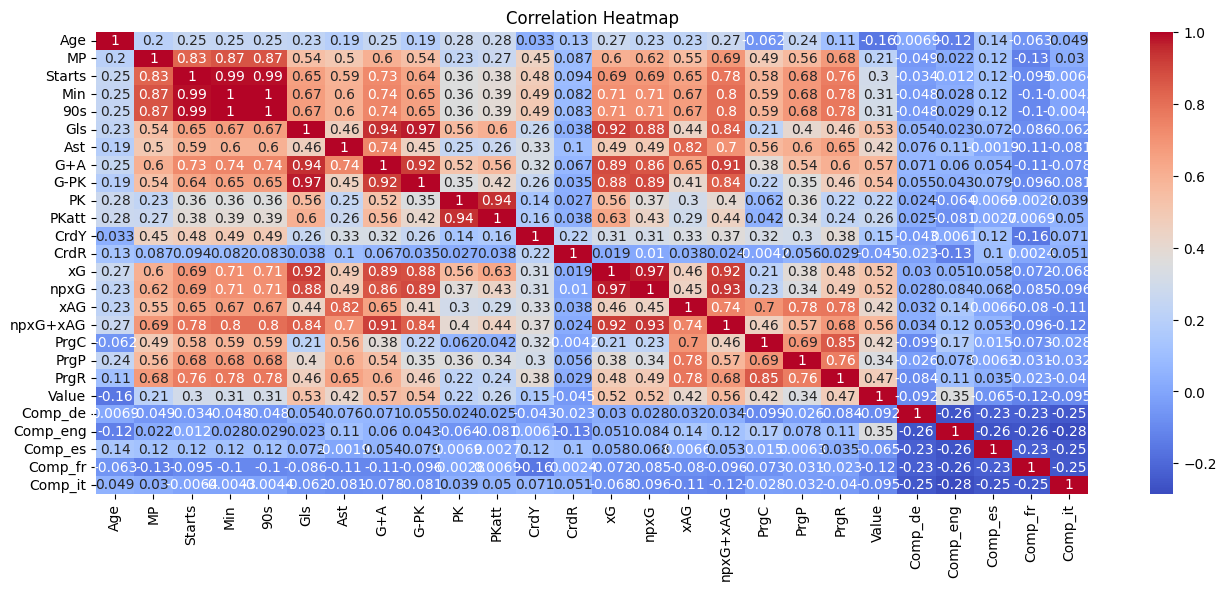

In [38]:
# Korrelation Heatmap erstellen
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

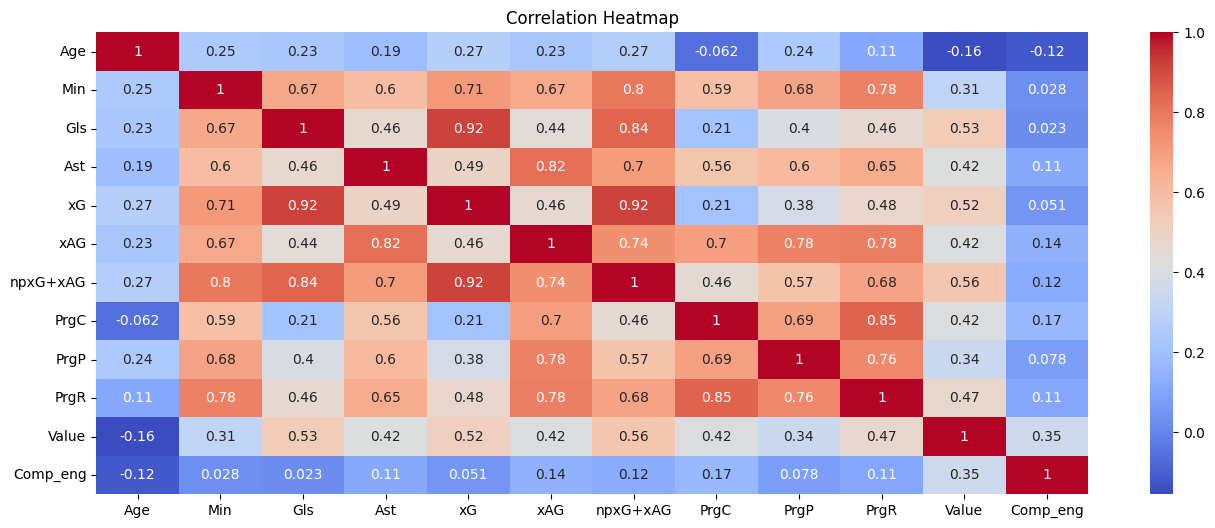

In [39]:
# Spalten "Starts", "MP" und "G+A" und "G-PK" löchen
df_merged = df_merged.drop('90s', axis=1)
df_merged = df_merged.drop('MP', axis=1)
df_merged = df_merged.drop('G+A', axis=1)
df_merged = df_merged.drop('G-PK', axis=1)
df_merged = df_merged.drop('npxG', axis=1)

# spalten "Starts", "PK", "PKatt", "CrdY", "CrdR", "Comp_de". "Comp_es", "Comp_fr", "Comp_it", löschen
df_merged = df_merged.drop('Starts', axis=1)
df_merged = df_merged.drop('PK', axis=1)
df_merged = df_merged.drop('PKatt', axis=1)
df_merged = df_merged.drop('CrdY', axis=1)
df_merged = df_merged.drop('CrdR', axis=1)
df_merged = df_merged.drop('Comp_de', axis=1)
df_merged = df_merged.drop('Comp_es', axis=1)
df_merged = df_merged.drop('Comp_fr', axis=1)
df_merged = df_merged.drop('Comp_it', axis=1)

'''
# gehe jede Spalte durch
for col in df_merged.columns:
    # Spalte "Comp_eng" überspringen
    if col == 'Comp_eng' or col == 'Comp_de' or col == 'Comp_es' or col == 'Comp_fr' or col == 'Comp_it':
        continue
    
    # Calculate mean and standard deviation
    mean = df_merged[col].mean()
    std_dev = df_merged[col].std()

    # finde ausreißer
    outliers = df_merged[(df_merged[col] > mean + 4 * std_dev) | (df_merged[col] < mean - 4 * std_dev)]

    # print outliers
    print(f"Outliers for column {col}")
    print(outliers)

    # remove outliers
    df_merged = df_merged.drop(outliers.index)


# Remove outliers for column "Value"
mean = df_merged['Value'].mean()
std_dev = df_merged['Value'].std()
outliers = df_merged[(df_merged['Value'] > mean + 3 * std_dev) | (df_merged['Value'] < mean - 3 * std_dev)]
df_merged = df_merged.drop(outliers.index)
'''

# Plot nochmal erstellen
correlation = df_merged.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Splitting data into features and target variable
X = df_merged.drop('Value', axis=1)
y = df_merged['Value']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training and evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}

for modelName, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {modelName}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"R2 Score: {r2_score(y_test, y_pred)}")
    print("\n")

Model: Linear Regression
Mean Squared Error: 360770808374693.2
R2 Score: 0.5654213591689337


Model: Random Forest Regression
Mean Squared Error: 456485718846153.9
R2 Score: 0.45012473667514874


Model: Gradient Boosting Regression
Mean Squared Error: 502952416966617.44
R2 Score: 0.39415170880165795


Model: SVR
Mean Squared Error: 960754447483114.1
R2 Score: -0.15730916212593904


Model: KNN
Mean Squared Error: 675244769230769.2
R2 Score: 0.1866111469422893




In [53]:
# predict values Gradient Boosting Regression
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

# create a DataFrame with the predicted values as int and the actual values
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.astype(int)})
print(df_pred)

       Actual  Predicted
689   7000000    6766131
339   4000000   10210035
739  40000000   72497828
28    4500000    9910260
271  20000000   39068517
..        ...        ...
921  12000000   13740566
663  50000000   14129684
187   8000000   10410834
366   3500000   10208422
635  70000000   50942364

[65 rows x 2 columns]


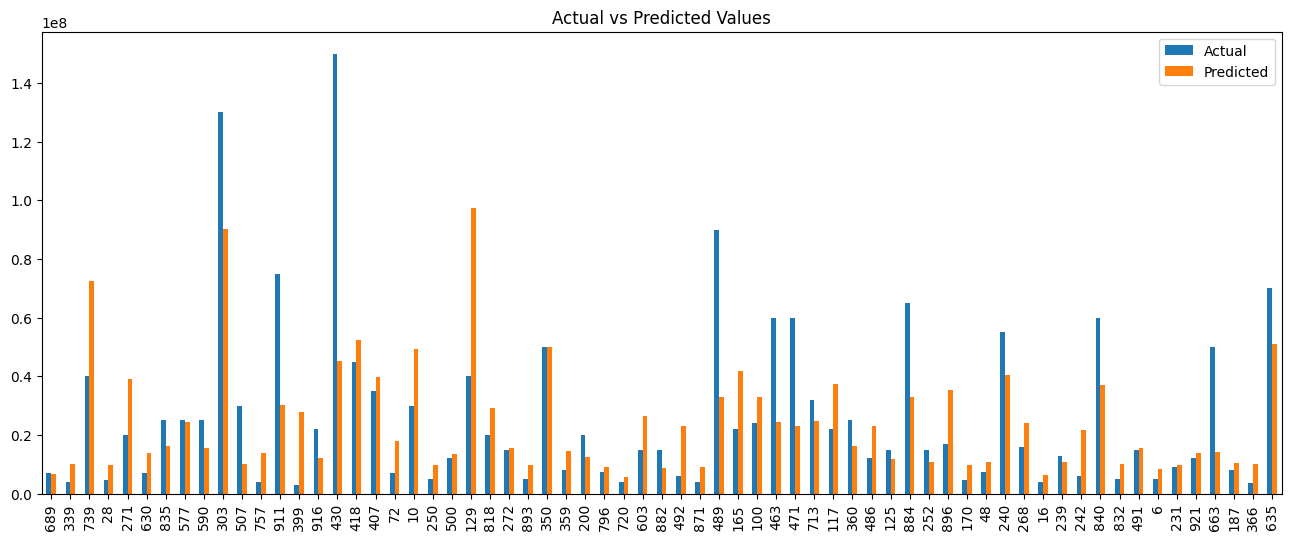

In [54]:
# plot predicted and actual values
df_pred.plot(kind='bar', figsize=(16, 6))
plt.title('Actual vs Predicted Values')
plt.show()

In [56]:
# Demo für die Vorhersage
# Spielerdaten
player_data = {
    "Age": 28,
    "Min": 1823,
    "Gls": 4,
    "Ast": 1,
    "xG": 4.4,
    "xAG": 1.4,
    "npxG+xAG": 5.8,
    "PrgC": 58,
    "PrgP": 46,
    "PrgR": 83,
    "Comp_eng": 1,  
}

# Vorhersage für den Spieler
player_df = pd.DataFrame([player_data])
# Vorhersage als int ausgeben
prediction = int(gbr.predict(player_df)[0])
print(f"Predicted Value: {prediction}")



Predicted Value: 18093687


In [44]:
# Save To Disk
import pickle

# save the classifier
with open('GradientBoostingRegressor.pkl', 'wb') as fid:
    pickle.dump(gbr, fid)    

# load it again
with open('GradientBoostingRegressor.pkl', 'rb') as fid:
    gbr_loaded = pickle.load(fid)